# 3. Визуализация данных с использованием библиотек matplotlib и seaborn

## Цель работы
Научиться строить некоторые виды графиков, используемые в анализе данных, при помощи библиотек matplotlib и seaborn.

### Задания для выполнения:
0) Загрузите датасет для предсказани цены квартиры в зависимости от ряда признаков.

1) Постройте круговую диаграмму для признака Rooms, иллюстрирующую количество квартир в процентах в зависимости от количества комнат. Сделайте сектор с наибольшим числом квартир выдвинутым.

2) Постройте гистограмму целевой переменной Price. Оцените визуально, по какой цене продаётся наибольшее количество квартир.

3) Постройте диаграммы рассеяния для признаков Rooms, Square, HouseFloor, HouseYear в зависимости от целевой переменной Price в одной области fiagure(). Оцените визуально, есть ли среди них такие, на которых разброс точек близок к линейной функции.

4) Постройте ядерную оценку плотности целевой переменной Price. Оцените визуально, напоминает ли полученный график нормальное распределение. Постройте двумерную ядерную оценку плотности для целевой переменной Price и признака HouseFloor, затем оцените визуально на каких этажах и по какой цене продаётся основная масса квартир.

5) Постройте ящиковую диаграмму признака Square. Оцените визуально имеются ли выбросы, и, если да, то начиная с какого размера площади значение признака можно считать выбросом.

6) При помощи сетки графиков PairGrid визуализируйте попарные отношения признаков Rooms, Square, HouseFloor, HouseYear, Price следующим образом: на диагонали - гистограммы, под диагональю - ядерные оценки плотности, над диагональю - диаграммы рассеяния. По результатам визуализации сделайте выводы (аналогичные п.2,3,4).

7) Постройте тепловую карту матрицы корреляции (df.corr()) признаков Rooms, Square, HouseFloor, HouseYear, Price. По ней определите, какие признаки являются зависимыми (у таких признаков коэффициент корреляции близок к единице).

Должны быть подписаны названия графиков, названия осей, указаны значения на осях. Оцениваться будет использование количества различных атрибутов при построении графиков и визуальная красота.

### Методические указания
Ознакомьтесь с официальной документацией по библиотекам matplotlib и seaborn.

### Дополнительные задания:
1) Постройте график jointplot (гибрид scatterplot и histogram) из библиотеки seaborn.

2) Постройте график violinplot (гибрид boxplot и ядерной оценки плотности) из библиотеки seaborn.

3) Поработайте с сеткой подзаголовков FacetGrid.

### Контрольные вопросы:
1) Построение каких основных видов графиков используется при анализе данных в машинном обучении?

2) В чём разница между библиотеками matplotlib и seaborn. Преимущества каждой из них.

3) Как задать размер графика в matplotlib?

4) Как установить стили в seaborn?

5) Для чего используют подграфики subplots?

6) Что изображается на ящиковой диаграмме?

7) Как поменять палитру цветов у тепловой карты.

In [16]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### №0

In [18]:
train_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/5 семестр. Машинное обучение/data/train.csv")
# train_dataset["HouseYear"] = pd.to_datetime(train_dataset['HouseYear'], format="%Y")
train_dataset

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


### №1

In [19]:
amount_of_rooms_and_flats = train_dataset["Rooms"].value_counts() / len(train_dataset["Rooms"])
titles = amount_of_rooms_and_flats.index
amount = amount_of_rooms_and_flats.values
explode = np.where(amount_of_rooms_and_flats == np.max(amount_of_rooms_and_flats), 0.1, 0)
explode

array([0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

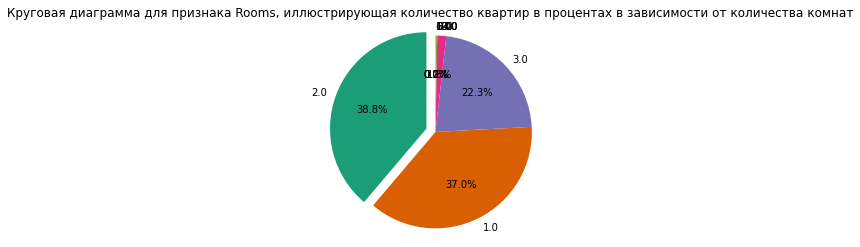

In [20]:
fig1, ax1 = plt.subplots()
ax1.pie(amount, labels = titles, explode = explode, colors = plt.cm.Dark2.colors, startangle = 90, autopct = '%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Круговая диаграмма для признака Rooms, иллюстрирующая количество квартир в процентах в зависимости от количества комнат")

plt.show()

### №2

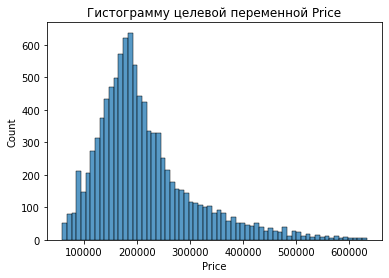

In [21]:
sns.histplot(data=train_dataset, x = "Price").set_title('Гистограмму целевой переменной Price')
plt.show()

#### по цене 180-185 к

### №3

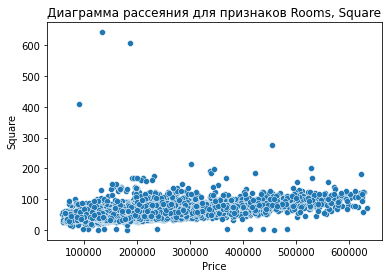

In [22]:
sns.scatterplot(data = train_dataset, x = "Price", y = "Square").set_title('Диаграмма рассеяния для признаков Rooms, Square')
plt.show()

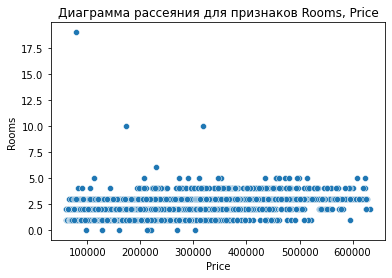

In [23]:
sns.scatterplot(data = train_dataset, x = "Price", y = "Rooms").set_title('Диаграмма рассеяния для признаков Rooms, Price')
plt.show()

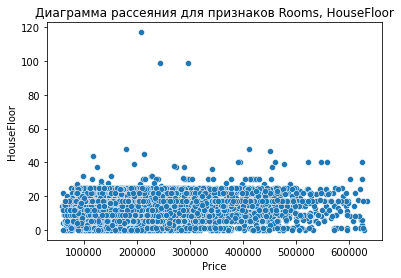

In [24]:
sns.scatterplot(data = train_dataset, x = "Price", y = "HouseFloor").set_title('Диаграмма рассеяния для признаков Rooms, HouseFloor')
plt.show()

In [25]:
# Удалим выбросы
train_dataset = train_dataset.query("HouseYear != 20052011")
train_dataset = train_dataset.query("HouseYear != 4968")

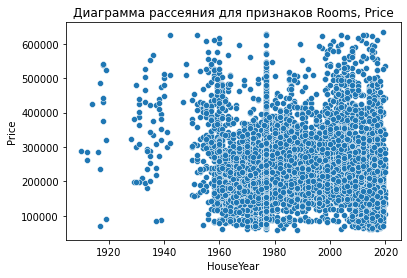

In [26]:
sns.scatterplot(data = train_dataset, x = "HouseYear", y = "Price").set_title('Диаграмма рассеяния для признаков Rooms, Price')
plt.show()

### №4

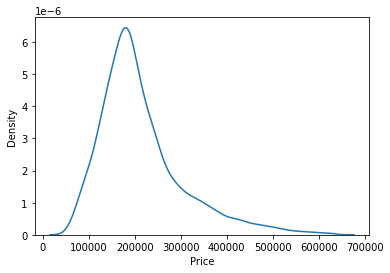

In [27]:
sns.kdeplot(data = train_dataset, x = "Price")

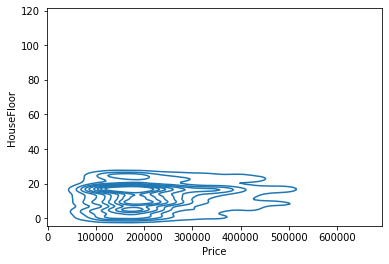

In [28]:
sns.kdeplot(data = train_dataset, x = "Price", y = "HouseFloor")

### №5

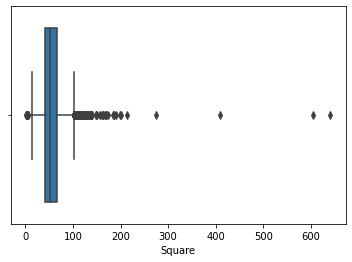

In [29]:
sns.boxplot(x = train_dataset["Square"])

#### выбросы: 0 и более 100 м^2

### №6

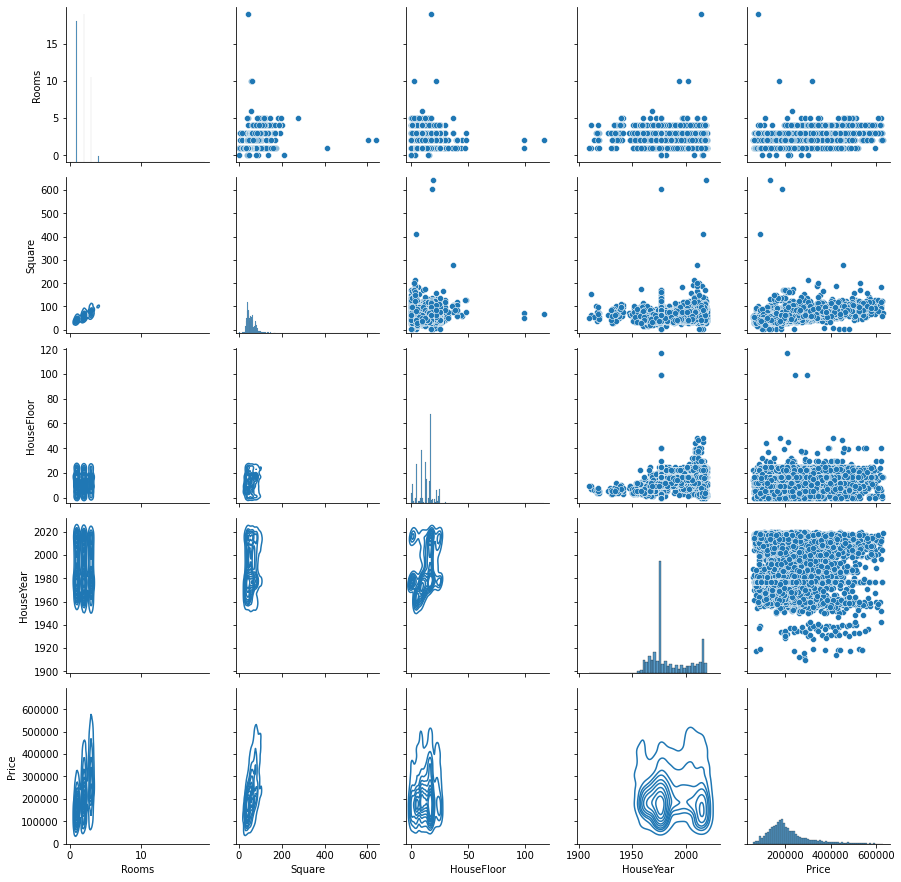

In [30]:
g = sns.PairGrid(train_dataset[["Rooms", "Square", "HouseFloor", "HouseYear", "Price"]])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
# Rooms, Square, HouseFloor, HouseYear, Price

### №7

Text(0.5, 1.0, 'Variable Correlation')

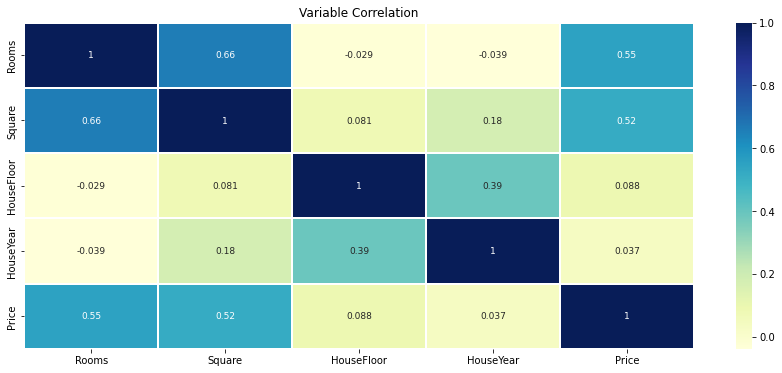

In [31]:
plt.figure(figsize = (15,6))
sns.heatmap(train_dataset[["Rooms", "Square", "HouseFloor", "HouseYear", "Price"]].corr(), cmap = 'YlGnBu', linewidth = 1, annot = True, annot_kws = {'size':9})
plt.title('Variable Correlation')